In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
import itertools  
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
train_data_path = 'rice3/train'
valid_data_path = 'rice3/valid'
img_rows = 256
img_cols = 256
batch_size = 33

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=45,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')


Found 450 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
from keras import layers
from keras.models import Model

def lenet_5(in_shape=(256,256,3), n_classes=3, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=20, kernel_size=5,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=5,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(500, activation='relu')(flatten)
    preds = layers.Dense(n_classes, activation='softmax')(dense1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = lenet_5()
    print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 20)      1520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 20)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 50)      25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dens

In [5]:
history = model.fit_generator(train_generator,
                    steps_per_epoch= 450/33,
                    epochs=10,
                    validation_data=validation_generator,
                    verbose=1,
                    validation_steps= 300/33)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
14/13 [==============================] - 88s 6s/step - loss: 1.1945 - acc: 0.4179 - val_loss: 0.9400 - val_acc: 0.5700
Epoch 2/10
14/13 [==============================] - 77s 5s/step - loss: 1.0830 - acc: 0.3886 - val_loss: 1.0147 - val_acc: 0.5867
Epoch 3/10
14/13 [==============================] - 76s 5s/step - loss: 1.0717 - acc: 0.4960 - val_loss: 0.9874 - val_acc: 0.5133
Epoch 4/10
14/13 [==============================] - 83s 6s/step - loss: 0.9557 - acc: 0.4432 - val_loss: 0.8795 - val_acc: 0.4567
Epoch 5/10
14/13 [==============================] - 94s 7s/step - loss: 0.9635 - acc: 0.5784 - val_loss: 1.0845 - val_acc: 0.3333
Epoch 6/10
14/13 [==============================] - 99s 7s/step - loss: 0.9455 - acc: 0.4663 - val_loss: 0.6110 - val_acc: 0.8100
Epoch 7/10
14/13 [==============================] - 96s 7s/step - loss: 1.1717 - acc: 0.6214 - val_loss: 0.6975 - val_acc: 0.6600
Epoch 8/10
14/13 [========================

In [6]:
Y_pred = model.predict_generator(validation_generator, 300/33)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['BrownSpot','Healthy','Leaf Blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[  0 100   0]
 [ 18  73   9]
 [ 37  55   8]]
Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.00      0.00      0.00       100
     Healthy       0.32      0.73      0.45       100
 Leaf Blight       0.47      0.08      0.14       100

   micro avg       0.27      0.27      0.27       300
   macro avg       0.26      0.27      0.19       300
weighted avg       0.26      0.27      0.19       300



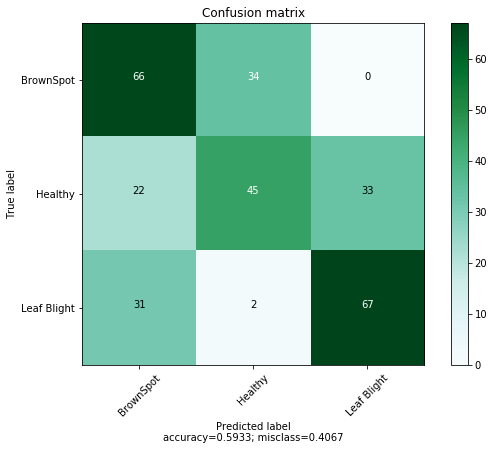

In [9]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
  
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(validation_generator.classes, y_pred), target_names = ['BrownSpot','Healthy','Leaf Blight'],cmap='BuGn') 


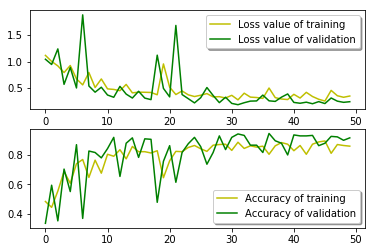

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='y', label="Loss value of training")
ax[0].plot(history.history['val_loss'], color='g', label="Loss value of validation",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='y', label="Accuracy of training")
ax[1].plot(history.history['val_acc'], color='g',label="Accuracy of validation")
legend = ax[1].legend(loc='best', shadow=True) 

In [18]:
class_dict = train_generator.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'BrownSpot': 0, 'Healthy': 1, 'Leaf Blight': 2}
['BrownSpot', 'Healthy', 'Leaf Blight']


Following is our prediction:


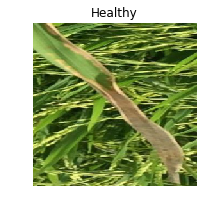

In [22]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "rice3/test/Leaf Blight/IMG_33.JPG"
#image_path = "potato1/test/Potato___Late_blight/3112e625-f1d9-428b-a77e-23c6f28e44f8___RS_LB 3035.JPG"
new_img = image.load_img(image_path, target_size=(256,256),color_mode='rgb')
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (3,3))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               33554560  
__________